In [52]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [53]:
#importing 1st transactions
test_df_sample= pd.read_csv("test_sample.csv")
test_df_sample.drop(['msno', 'is_churn', 'bd','payment_method_id', 'city', 'registered_via'], axis=1, inplace=True)


In [54]:
#import model and preprocessor

package = joblib.load("../Churn_prediction/model.pkl")

loaded_model = package.named_steps['classifier']
loaded_preproc = package.named_steps['preprocessor']

In [55]:
#feature importance
coefficients = loaded_model.coef_[0]

In [56]:
#list features for their scalers
robust_features = [               'remaining_plan_duration', 
          'usage_from_ltd',
              'payment_plan_days',
              'plan_list_price',
              'actual_amount_paid',
             'num_50',
              'num_75',
              'num_985',
              
              'expire_year',
              'last_transaction_year'
             ]
minmax_features = ['registration_year']
normal_features = [ 'num_25',
              
              'num_100',
              'num_unq',
              'total_secs',]

transformed_columns = robust_features + minmax_features + normal_features
passthrough_cols = [col for col in test_df_sample.columns if col not in transformed_columns]
new_cols_order = transformed_columns + passthrough_cols

In [57]:
#feature importance to df
feature_importance = pd.DataFrame({'Feature': new_cols_order, 'Importance': coefficients})


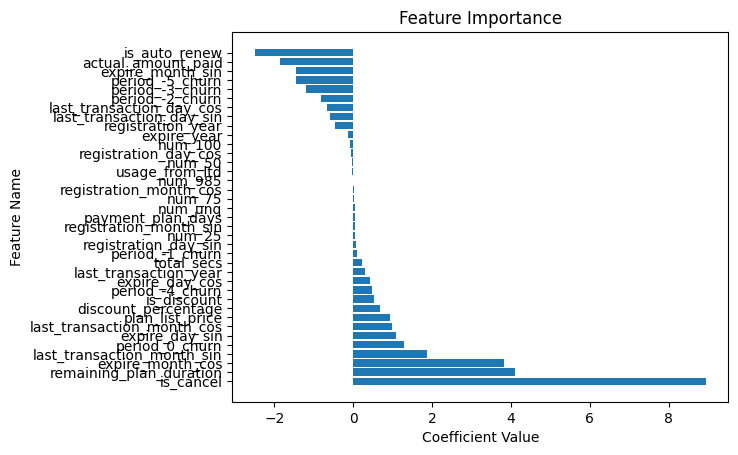

In [58]:
#plot
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [59]:
#to CSV
feature_importance.to_csv('feature_importance.csv', index=False)
